<a href="https://colab.research.google.com/github/abdullahnb1/18.uorg_g-rev/blob/main/Part1_MatrixVector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Matrix and Vector


### Overview

Linear algebra is one of the most useful branches of applied mathematics.

For example, many applied problems in engieering require the solution of a linear system of equations, such as

$$
\begin{aligned}
    y_1 = a x_1 + b x_2 \\
    y_2 = c x_1 + d x_2
\end{aligned}
$$

or, more generally,

$$
\begin{aligned}
    y_1 = a_{11} x_1 + a_{12} x_2 + \cdots + a_{1n} x_n \\
    \vdots  \\
    y_m = a_{m1} x_1 + a_{m2} x_2 + \cdots + a_{mn} x_n
\end{aligned}
$$

The objective here is to solve for the “unknowns” $ x_1, \ldots, x_n $ given $ a_{11}, \ldots, a_{mn} $ and $ y_1, \ldots, y_m $.

When considering such problems, it is essential that we first consider at least some of the following questions

- Does a solution actually exist?  
- Are there in fact many solutions, and if so how should we interpret them?  
- If no solution exists, is there a best “approximate” solution?  
- If a solution exists, how should we compute it?  


These are the kinds of topics addressed by linear algebra.

In this lecture we will cover the basics of linear and matrix algebra, treating both theory and computation.


Note that this lecture is more theoretical than most, and contains background
material that will be used in applications as we go along.

Let’s start with some imports:

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import inv, solve, det, eig

### 1. Vectors


<a id='index-2'></a>
A *vector* of length $ n $ is just a sequence (or array, or tuple) of $ n $ numbers, which we write as $ u = (u_1, \ldots, u_n) $ or  $ u = [u_1, \ldots, u_n] $.

We can write these sequences either horizontally or (generally) vertically.

(Later, when we wish to perform certain matrix operations, it will become necessary to distinguish between the two)

The set of all $ n $-vectors is denoted by $ \mathbb R^n $.

For example, $ \mathbb R ^2 $ is the plane, and a vector in $ \mathbb R^2 $ is just a point in the plane.

Traditionally, vectors are represented visually as arrows from the origin to
the point.

The following figure represents three vectors in this manner

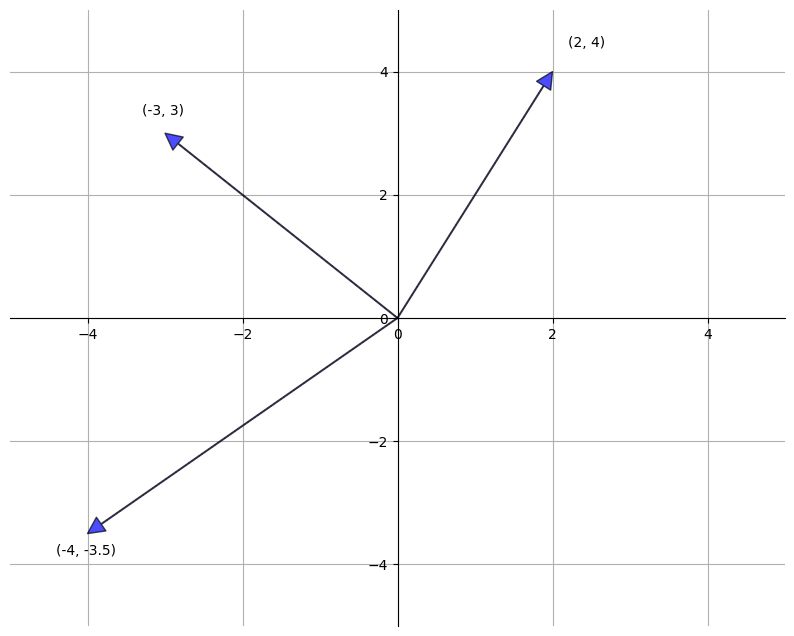

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

## Vector Operations


<a id='index-3'></a>
The two most common operators for vectors are addition and scalar multiplication, which we now describe.

As a matter of definition, when we add two vectors, we add them element-by-element

$$
u + v =
\begin{bmatrix}
    u_1 \\
    u_2 \\
    \vdots \\
    u_n
\end{bmatrix} +
\begin{bmatrix}
     v_1 \\
     v_2 \\
    \vdots \\
     v_n
\end{bmatrix} =
\begin{bmatrix}
    u_1 + v_1 \\
    u_2 + v_2 \\
    \vdots \\
    u_n + v_n
\end{bmatrix}
$$

Scalar multiplication is an operation that takes a scalar $ \gamma $ and a
vector $ u $ and produces

$$
\gamma u =
\begin{bmatrix}
    \gamma u_1 \\
    \gamma u_2 \\
    \vdots \\
    \gamma u_n
\end{bmatrix}
$$

Scalar multiplication is illustrated in the next figure

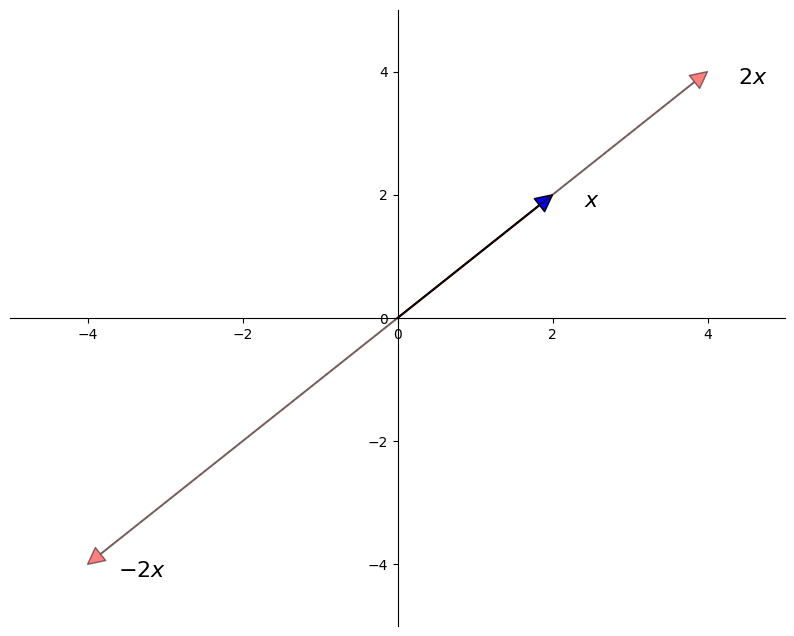

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
x = (2, 2)
ax.annotate('', xy=x, xytext=(0, 0),
            arrowprops=dict(facecolor='blue',
            shrink=0,
            alpha=1,
            width=0.5))
ax.text(x[0] + 0.4, x[1] - 0.2, '$x$', fontsize='16')


scalars = (-2, 2)
x = np.array(x)

for s in scalars:
    v = s * x
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.5,
                width=0.5))
    ax.text(v[0] + 0.4, v[1] - 0.2, f'${s} x$', fontsize='16')
plt.show()

In Python, a vector can be represented as a list or tuple, such as $x = (2, 4, 6)$, but is more commonly
represented as a [NumPy array](https://python-programming.quantecon.org/numpy.html#numpy-arrays).

One advantage of NumPy arrays is that scalar multiplication and addition have very natural syntax

In [ ]:
u = np.ones(3)            # Vector of three ones
#v = np.array((2, 4, 6))  # Converts tuple (2, 4, 6) into array
u = np.array([2,4,6])     # using array
u + v

array([ 4,  8, 12])

In [ ]:
4 * u

array([ 8, 16, 24])

### Inner Product and Norm

The *inner product* of vectors $ u,v \in \mathbb R ^n $ is defined as

$$
u\cdot v = u^{T} v = \sum_{i=1}^n u_i v_i
$$

Two vectors are called *orthogonal* if their inner product is zero.

The *norm* of a vector $ x $ represents its “length” (i.e., its distance from the zero vector) and is defined as

$$
\| u \| := \sqrt{u^{T} u} := \left( \sum_{i=1}^n u_i^2 \right)^{1/2}
$$

The expression $ \| u - v\| $ is thought of as the distance between $ u $ and $ v $.

Continuing on from the previous example, the inner product and norm can be computed as
follows

In [ ]:
np.sum(u * v)          # Inner product of u and v

56

In [ ]:
np.sqrt(np.sum(u**2))  # Norm of u, using definition

7.483314773547883

In [ ]:
np.linalg.norm(u)      # Norm of u, or built-in function

7.483314773547883

Let's load required libraries to be used in future
like numpy, matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Now let's solve a very simple problem from our middle school time:
$\begin{align} 2x - y = 1 \\ x + y = 5\end{align}$. We write the system as $\mathbf{A} \mathbf{x} = \mathbf{b}$ where we are going to find the vector $\mathbf{x} = \begin{bmatrix} x\\ y\end{bmatrix}$ such that the given system is satisfied.

In [ ]:
A = np.array([[2, -1],[1,1]])

In [ ]:
b = np.array([[1], [5]])

This system is so nice that we can directly find $\mathbf{x}$ as $\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$.

In [ ]:
#x = np.matmul(np.linalg.inv(A),b)
x = np.linalg.inv(A)@b
print(x)

[[2.]
 [3.]]


### 2. Matrices


<a id='index-8'></a>
Matrices are a neat way of organizing data for use in linear operations.

An $ n \times k $ matrix is a rectangular array $ A $ of numbers with $ n $ rows and $ k $ columns:

$$
A =
\begin{bmatrix}
    a_{11} & a_{12} & \cdots & a_{1k} \\
    a_{21} & a_{22} & \cdots & a_{2k} \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix}
$$

Often, the numbers in the matrix represent coefficients in a system of linear equations, as discussed at the start of this lecture.

For obvious reasons, the matrix $ A $ is also called a vector if either $ n = 1 $ or $ k = 1 $.

In the former case, $ A $ is called a *row vector*, while in the latter it is called a *column vector*.

If $ n = k $, then $ A $ is called *square*.

The matrix formed by replacing $ a_{ij} $ by $ a_{ji} $ for every $ i $ and $ j $ is called the *transpose* of $ A $ and denoted $ A' $ or $ A^{\top} $.

If $ A = A' $, then $ A $ is called *symmetric*.

For a square matrix $ A $, the $ i $ elements of the form $ a_{ii} $ for $ i=1,\ldots,n $ are called the *principal diagonal*.

$ A $ is called *diagonal* if the only nonzero entries are on the principal diagonal.

If, in addition to being diagonal, each element along the principal diagonal is equal to 1, then $ A $ is called the *identity matrix* and denoted by $ I $.

### Matrix Operations


<a id='index-9'></a>
Just as was the case for vectors, a number of algebraic operations are defined for matrices.

Scalar multiplication and addition are immediate generalizations of the vector case:

$$
\gamma A =
\gamma
\begin{bmatrix}
    a_{11} &  \cdots & a_{1k} \\
    \vdots & \vdots  & \vdots \\
    a_{n1} &  \cdots & a_{nk}
\end{bmatrix} :=
\begin{bmatrix}
    \gamma a_{11} & \cdots & \gamma a_{1k} \\
    \vdots & \vdots & \vdots \\
    \gamma a_{n1} & \cdots & \gamma a_{nk}
\end{bmatrix}
$$

and

$$
A + B =
\begin{bmatrix}
    a_{11} & \cdots & a_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} & \cdots & a_{nk}
\end{bmatrix} +
\begin{bmatrix}
    b_{11} & \cdots & b_{1k} \\
    \vdots & \vdots & \vdots \\
    b_{n1} & \cdots & b_{nk}
\end{bmatrix} =
\begin{bmatrix}
    a_{11} + b_{11} &  \cdots & a_{1k} + b_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} + b_{n1} &  \cdots & a_{nk} + b_{nk}
\end{bmatrix}
$$

In the latter case, the matrices must have the same shape in order for the definition to make sense.

We also have a convention for *multiplying* two matrices.

The rule for matrix multiplication generalizes the idea of inner products discussed above
and is designed to make multiplication play well with basic linear operations.

If $ A $ and $ B $ are two matrices, then their product $ A B $ is formed by taking as its
$ i,j $-th element the inner product of the $ i $-th row of $ A $ and the
$ j $-th column of $ B $.

There are many tutorials to help you visualize this operation, such as [this one](https://www.mathsisfun.com/algebra/matrix-multiplying.html), or the discussion on the [Wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication).

If $ A $ is $ n \times k $ and $ B $ is $ j \times m $, then
to multiply $ A $ and $ B $ we require $ k = j $, and the
resulting matrix $ A B $ is $ n \times m $.

As perhaps the most important special case, consider multiplying $ n \times k $ matrix $ A $ and $ k \times 1 $ column vector $ x $.

According to the preceding rule, this gives us an $ n \times 1 $ column vector

$$
A x =
\begin{bmatrix}
    a_{11} &  \cdots & a_{1k} \\
    \vdots & \vdots  & \vdots \\
    a_{n1} &  \cdots & a_{nk}
\end{bmatrix}
\begin{bmatrix}
    x_{1}  \\
    \vdots  \\
    x_{k}
\end{bmatrix} :=
\begin{bmatrix}
    a_{11} x_1 + \cdots + a_{1k} x_k \\
    \vdots \\
    a_{n1} x_1 + \cdots + a_{nk} x_k
\end{bmatrix} \tag{3.2}
$$

>**Note**
>
>$ A B $ and $ B A $ are not generally the same thing.

Another important special case is the identity matrix.

You should check that if $ A $ is $ n \times k $ and $ I $ is the $ k \times k $ identity matrix, then $ AI = A $.

If $ I $ is the $ n \times n $ identity matrix, then $ IA = A $.

### Matrices in NumPy


<a id='index-10'></a>
NumPy arrays are also used as matrices, and have fast, efficient functions and methods for all the standard matrix operations <sup><a href=#fn-mdt id=fn-mdt-link>[1]</a></sup>.

You can create them manually from tuples of tuples (or lists of lists) as follows

In [ ]:
A = ((1, 2),
     (3, 4))

type(A)

tuple

In [ ]:
A = np.array(A)

type(A)

numpy.ndarray

In [ ]:
A.shape

(2, 2)

The `shape` attribute is a tuple giving the number of rows and columns —
see [here](https://python-programming.quantecon.org/numpy.html#shape-and-dimension)
for more discussion.

To get the transpose of `A`, use `A.transpose()` or, more simply, `A.T`.

There are many convenient functions for creating common matrices (matrices of zeros,
ones, etc.) — see [here](https://python-programming.quantecon.org/numpy.html#creating-arrays).

Since operations are performed elementwise by default, scalar multiplication and addition have very natural syntax

In [ ]:
A = np.identity(3)
B = np.ones((3, 3))
2 * A

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [ ]:
A + B

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

To multiply matrices we use the `@` symbol.

In particular, `A @ B` is matrix multiplication, whereas `A * B` is element-by-element multiplication.

See [here](https://python-programming.quantecon.org/numpy.html#matrix-multiplication) for more discussion.


<a id='la-linear-map'></a>

### 3. Matrix-Vector Multiplication
Here our aim is not to find the solution for sure, let's see geometric interpretation of $\mathbf{A} \mathbf{x} = \mathbf{b}$ i.e. find a vector $\mathbf{x}$ such that $\mathbf{A} \mathbf{x}$ gives the vector $\mathbf{b}$.

1) The row picture that we are all familiar with i.e. every row gives a linear equation:


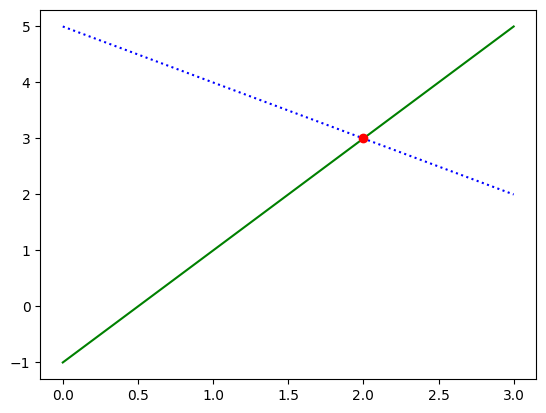

In [ ]:
xp = np.linspace(0, 3, 100)
plt.plot(xp,2*xp - 1,'-g', label='row 1')
plt.plot(xp, -xp+5, ':b', label='row 2')
plt.plot(x[0], x[1],'ro', label = 'itersection')
#plt.legend()

2) The column picture i.e. linear combination of columns of $\mathbf{A}$ such that  $x \begin{bmatrix} 2\\1\end{bmatrix} + y\begin{bmatrix} -1\\1\end{bmatrix} = \begin{bmatrix} 1\\5\end{bmatrix}$.

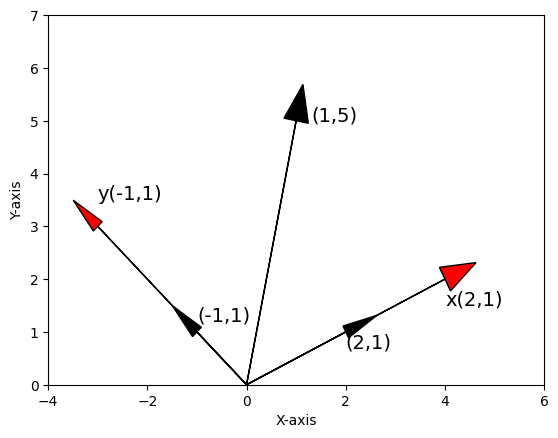

In [ ]:
ax = plt.axes()

ax.arrow(0.0, 0.0, 2.0, 1.0, head_width=0.25, head_length=0.7, fc='black', ec='black')
ax.annotate('(2,1)', (2,0.7),fontsize=14)
ax.arrow(0.0, 0.0, 4.0, 2.0, head_width=0.5, head_length=0.7, fc='red', ec='black')
ax.annotate('x(2,1)', (4,1.5),fontsize=14)
ax.arrow(0.0, 0.0, -1.0, 1.0, head_width=0.25, head_length=0.7, fc='black', ec='black')
ax.annotate('(-1,1)', (-1,1.2),fontsize=14)
ax.arrow(0.0, 0.0, -3.0, 3.0, head_width=0.25, head_length=0.7, fc='red', ec='black')
ax.annotate('y(-1,1)', (-3,3.5),fontsize=14)
ax.arrow(0.0, 0.0, 1.0, 5.0, head_width=0.5, head_length=0.7, fc='black', ec='black')
ax.annotate('(1,5)', (1.3,5),fontsize=14)
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.ylim(0,7)
plt.xlim(-4,6)
# plt.grid()
plt.draw()
plt.show()

What happens if $\mathbf{A} = \begin{bmatrix} 1 & 0\\0 & -1\end{bmatrix}$ for general vectors $\mathbf{x}$ such that  $\mathbf{x} \in \mathbf{R}^2$.

[[ 1]
 [-1]]
[[1]
 [1]]


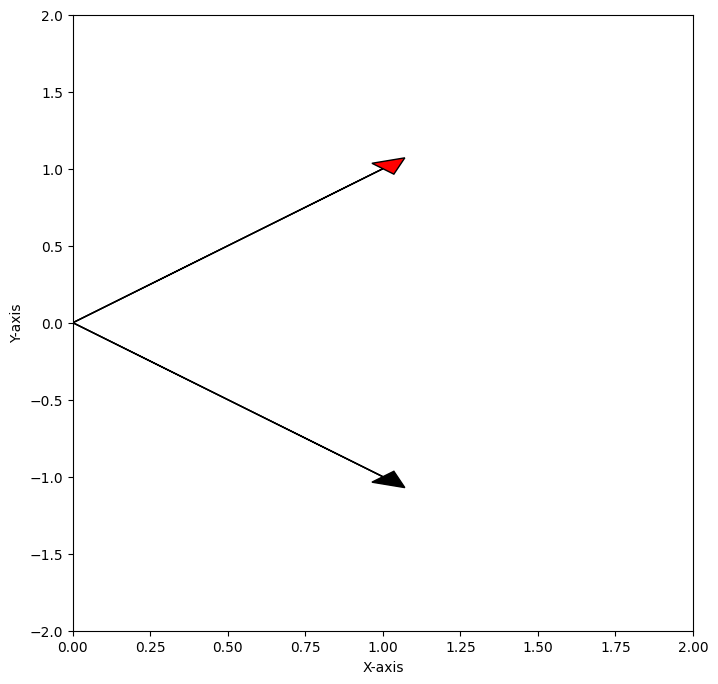

In [ ]:
x = np.array([[1],[-1]])
A = np.array([[1,0],[0,-1]])
b = np.matmul(A,x)
print(x)
print(b)

ax = plt.axes()
ax.arrow(0.0, 0.0, x[0,0], x[1,0], head_width=0.1, head_length=0.1, fc='black', ec='black')
ax.arrow(0.0, 0.0, b[0,0], b[1,0], head_width=0.1, head_length=0.1, fc='red', ec='black')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.ylim(-2,2)
plt.xlim(0,2)
plt.draw()
plt.show()

What happens if $\mathbf{A} = \begin{bmatrix} cos(\theta) & -sin(\theta)\\sin(\theta) & cos(\theta)\end{bmatrix}$ for general vectors $\mathbf{x}$ such that  $\mathbf{x} \in \mathbf{R}^2$.

[[ 1]
 [-1]]
[[0.3660254]
 [1.3660254]]


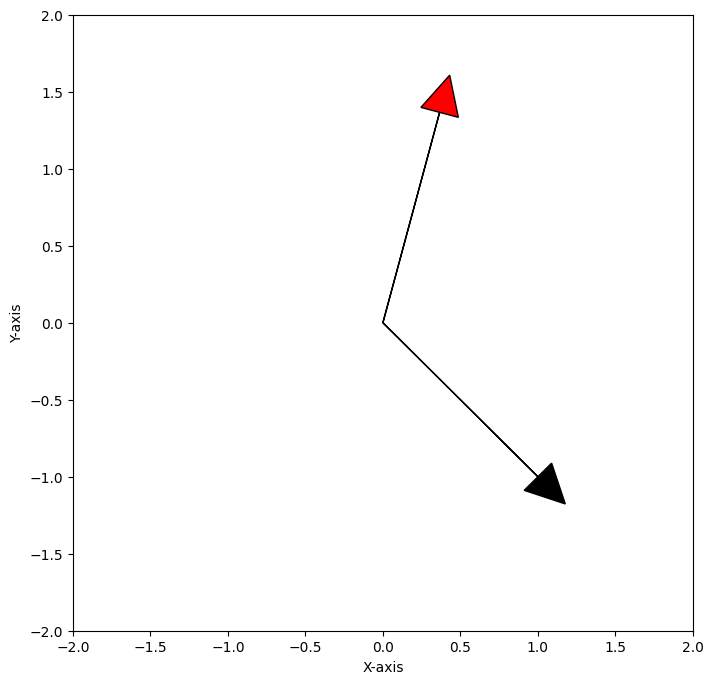

In [ ]:
import math
x = np.array([[1],[-1]])
t = 120*math.pi/180;
A = np.array([[math.cos(t),-math.sin(t)],[math.sin(t),math.cos(t)]])
b = np.matmul(A,x)
print(x)
print(b)

ax = plt.axes()
ax.arrow(0.0, 0.0, x[0,0], x[1,0], head_width=0.1, head_length=0.1, fc='black', ec='black')
ax.arrow(0.0, 0.0, b[0,0], b[1,0], head_width=0.1, head_length=0.1, fc='red', ec='black')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.draw()
plt.show()

In [ ]:
#Import Basic Libraries
import numpy as np
import matplotlib.pyplot as plt

### Basic Notation
Let: $\mathbf{A}_{m \times n}, \mathbf{v}_n$ be a matrix and a vector.

Let:  $ \mathbf{u} = \mathbf{A} \mathbf{v}$  where $\mathbf{u}, \mathbf{v} \in \mathbb{R}^n$.






In [ ]:
def MatrixVectorPlot(A,v,title):
    # Multiply
    u = A @ v

    plt.arrow(0,0, v[0], v[1], head_width=0.05, fc='g', ec='g')
    plt.arrow(0,0, u[0], u[1], head_width=0.05, fc='b', ec='b')
    plt.legend(['v', 'Av'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax = plt.gca()
    ax.set_aspect('equal', 'box')
    plt.grid()
    # find the angle between v and r
    theta = np.arccos(u @ v / np.linalg.norm(u) / np.linalg.norm(v)) * 180.0 / np.pi
    plt.title(f'{title}: theta= {round(theta,2)}')
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.show()


###Now test multiplication

$\mathbf{A}_{2 \times 2}$ is a rotation matrix.

$\mathbf{B}_{2 \times 2}$ is a shear matrix.

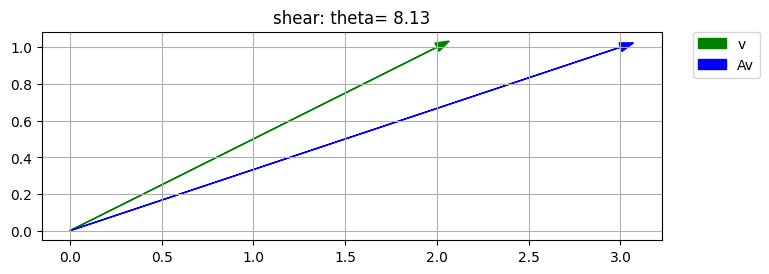

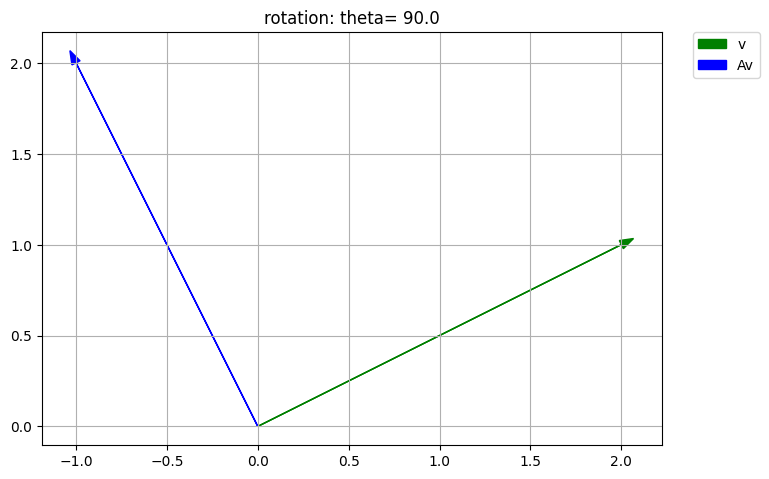

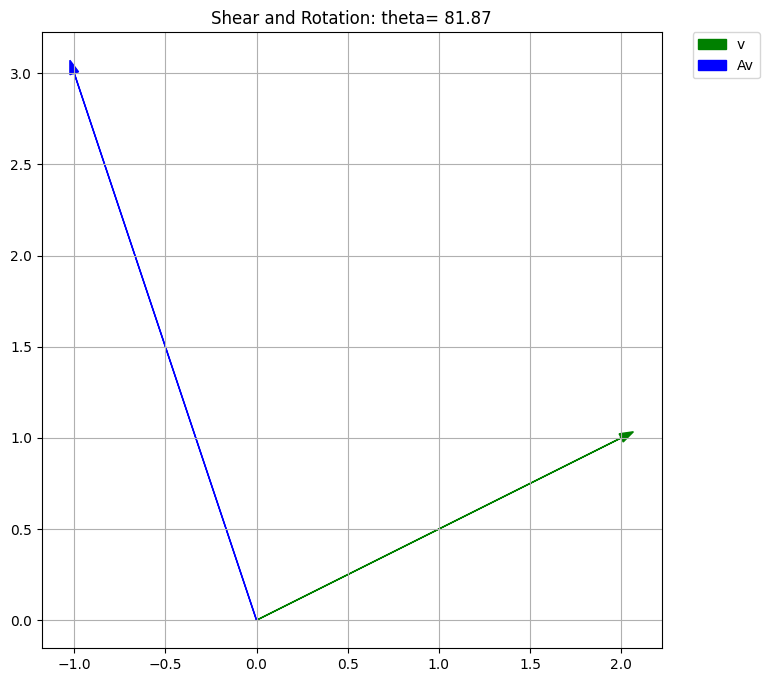

In [ ]:
# generate a 2x2 matrix
v = np.array([2,1]).transpose()
theta = 90*np.pi/180

# Create a counter-clockwise rotation
A = np.array([[np.cos(theta),-np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

# Create a shear
k = 1
B = np.array([[1,k],
              [0,1]])

#v = np.random.randint(-5, 5, (2,))
#A = np.random.randint(-5, 5, (2,2))

MatrixVectorPlot(B,v, 'shear')
MatrixVectorPlot(A,v, 'rotation')
MatrixVectorPlot(A@B,v, 'Shear and Rotation')
